In [1]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.circuit.library import QFT, PhaseGate
from qiskit.quantum_info import Operator
from math import log, ceil, floor, pi
# Computes (a+b) in fourier space given that qft has been 
# applied to the n bits of b before entering the circuit
def fourier_add_a(a, n_qubits):
    n = floor(log(a, 2)) + 1
    f_add_circ = QuantumCircuit(n_qubits)
    # Create and add classical-bit-wise controlled operators    
    for j in range(n_qubits-1, -1, -1):
        cp_a = a
        for i in range(1, n_qubits - j + 1):
            if cp_a % 2 == 1:
                #add a phase shift gate index i
                phase = 2 * pi / (2**(n_qubits - j - i + 1))
                phase_gate = PhaseGate(phase)
                f_add_circ.append(phase_gate, [j])
            cp_a = cp_a >> 1
    return f_add_circ

In [2]:
# Initializes binary representation of x using n qubits, highest
# order qubit at the top.
def init_x_circuit(x, n_qubits):
    x_circuit = QuantumCircuit(n_qubits)
    for i in range(n_qubits-1, -1, -1):
        bit = x % 2
        if bit == 1:
            x_circuit.x(i)
        x = x >> 1
    return x_circuit
        

In [3]:
def swap_circuit(n_qubits):
    swap_circuit = QuantumCircuit(n_qubits)
    for i in range(0, floor(n_qubits/2)):
        swap_circuit.swap(i, n_qubits - i - 1)
    return swap_circuit

In [12]:
# number to be hard-coded into the circuit
a=32
# number to be added
b=30
# max qubits for addition
n = floor(log(a, 2))+1 if (a>=b) else floor(log(b, 2))+1

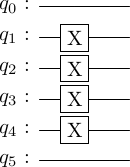

In [13]:
init_x_circuit(b, n).draw("latex")

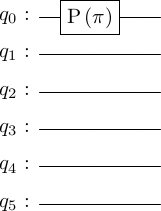

In [14]:
fourier_add_a(a, n).draw("latex")

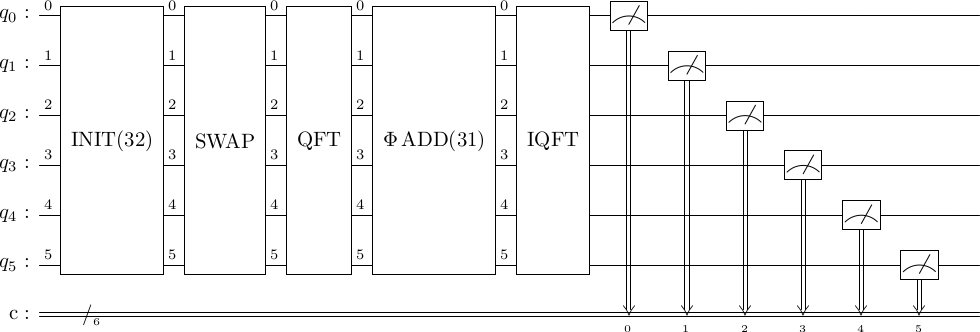

In [42]:
# number to be hard-coded into the circuit
a=31
# number to be added
b=32
# max qubits for addition
n = floor(log(a, 2))+1 if (a>=b) else floor(log(b, 2))+1

test_circuit = QuantumCircuit(n, n)
test_circuit.append(init_x_circuit(b, n).to_gate(label=f"INIT({b})"), range(n))
test_circuit.append(swap_circuit(n).to_gate(label="SWAP"), range(n))
test_circuit.append(QFT(n, do_swaps=True, inverse=False), range(n))
test_circuit.append(fourier_add_a(a, n).to_gate(label=f"\Phi ADD({a})"), range(n))
test_circuit.append(QFT(n, do_swaps=True, inverse=True), range(n))
test_circuit.measure(range(n), range(n))
test_circuit.draw("latex")

In [43]:
from qiskit.providers.aer import QasmSimulator
from qiskit import transpile

""" Simulation """
# Create a simulator
simulator = QasmSimulator()
# Compile the circuit for the simulator
compiled_circuit = transpile(test_circuit, simulator)
# Simulate the circuit
simulation = simulator.run(compiled_circuit, shots=10000)
# Get the simulation results
simulation_result = simulation.result()
counts = simulation_result.get_counts(compiled_circuit)
counts

{'111111': 10000}